### Predict delivery time using sorting time with Statsmodels 

#### Importing Libearies 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 

#### Importing Dataset 

In [4]:
data = pd.read_csv('F://Data_Set/delivery_time.csv') 

In [5]:
dataset_1 = data 

In [6]:
dataset_1.head() 

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Check any null Value is Present in the Dataset

In [7]:
dataset_1.isnull().sum()  

DeliveryTime    0
SortingTime     0
dtype: int64

Check any Outlier Present in the Delivery Time Column 

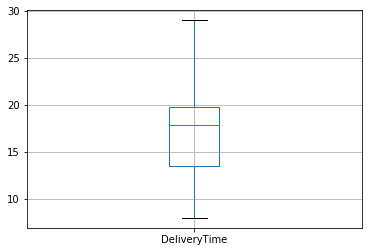

In [7]:
dataset_1.boxplot(column='DeliveryTime')

Check any Outlier in Sorting Time Column

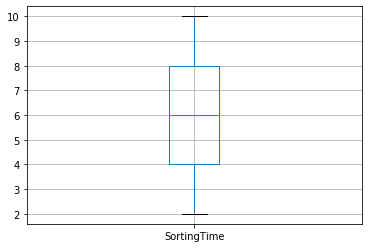

In [8]:
dataset_1.boxplot(column='SortingTime') 

Cheking dataset information 

In [9]:
dataset_1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#### Correlation 

In [10]:
dataset_1.corr() 

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


### Visualization of the Data using Distplot

Visualization of Delivery Time Column 

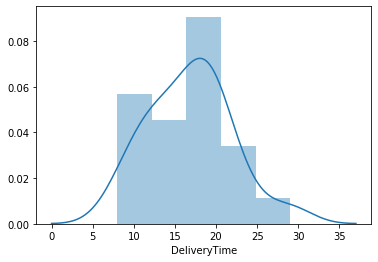

In [11]:
sns.distplot(dataset_1['DeliveryTime']) 

Visualization of Sorting Time 

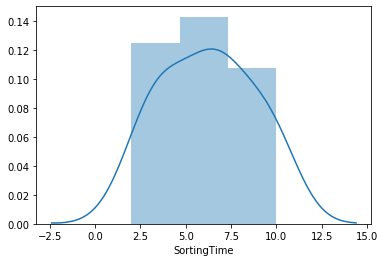

In [12]:
sns.distplot(dataset_1['SortingTime']) 

#### Fitting 1st Simple Linear Rigression model

In [8]:
model_1=smf.ols('DeliveryTime~SortingTime',data=dataset_1).fit() 

Regressor Plot 

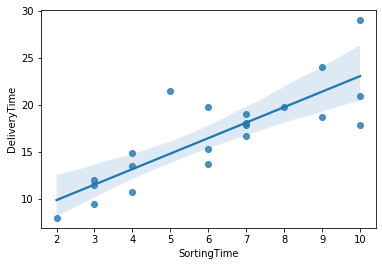

In [14]:
sns.regplot(x='SortingTime',y='DeliveryTime',data=dataset_1) 

#### Coefficent 

In [22]:
model_1.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

#### t and p value of 1st Model 

In [23]:
print(model_1.tvalues, '\n', model_1.pvalues) 

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


#### R Square Value of 1st Model

In [24]:
print(model_1.rsquared, '', model_1.rsquared_adj) 

0.6822714748417231  0.6655489208860244


Test for Normality of Residuals (Q-Q Plot) of 1st Model

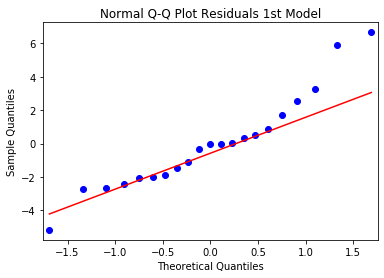

In [9]:
import statsmodels.api as sm 
qqplot = sm.qqplot(model_1.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals 1st Model')
plt.show() 

#### Summary of 1st Model 

In [25]:
model_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           3.98e-06
Time:                        23:29:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Predict New Data Point 

In [26]:
New_data = pd.Series([5,7,8,9,10])

In [27]:
New_data 

0     5
1     7
2     8
3     9
4    10
dtype: int64

In [28]:
# Data 

data_pred_1 = pd.DataFrame(New_data,columns=['SortingTime'])  

In [29]:
data_pred_1 

,SortingTime
0,5
1,7
2,8
3,9
4,10


Prediction of 1st Model 

In [30]:
y1_pred = model_1.predict(data_pred_1)  

In [31]:
y1_pred 

0    14.827833
1    18.125873
2    19.774893
3    21.423913
4    23.072933
dtype: float64

### 2nd Model Genration by using Log transformation of data 

In [10]:
dataset_2 = data 

Log Transformation on Dataset 

In [11]:
dataset_2['DeliveryTime']= np.log(dataset_2['DeliveryTime'])

dataset_2['SortingTime'] = np.log(dataset_2['SortingTime']) 

#### Visualization of the Data Log Transformed Data

Visualization of Delivery Time

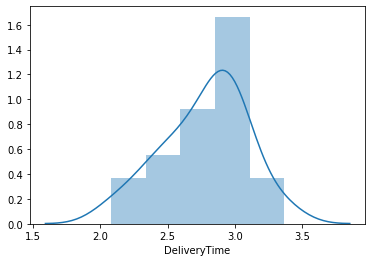

In [12]:
sns.distplot(dataset_2['DeliveryTime']) 

Visualization of Sorting Time 

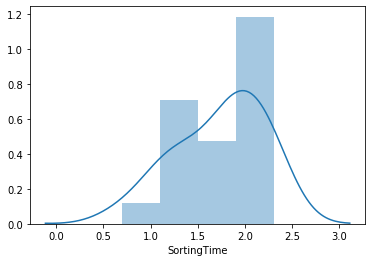

In [13]:
sns.distplot(dataset_2['SortingTime']) 

#### Fitting 2nd Linear Regression Model on Data 

In [14]:
model_2 = smf.ols('DeliveryTime~SortingTime',data=dataset_2).fit() 

Test for Normality of Residuals (Q-Q Plot) of 2nd Model

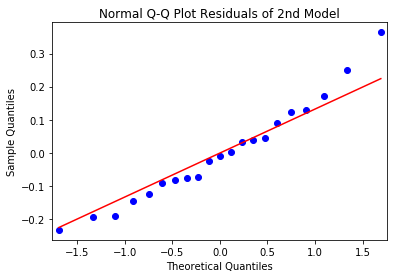

In [20]:
#import statsmodels.api as sm 
qqplot = sm.qqplot(model_2.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals of 2nd Model')
plt.show() 

Summary of 2nd Model

In [38]:
model_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           1.60e-07
Time:                        23:31:34   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      0.000       1.463       2.021
SortingTime     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3rd Model Genration by Reciprocal transformation of the Data 

In [16]:
dataset_3 = data 

#### Reciprocal Transformation of Dataset 

In [17]:
dataset_3['DeliveryTime'] = 1/(dataset_3['DeliveryTime']+1) 

dataset_3['SortingTime'] = 1/(dataset_3['SortingTime']+1) 

#### Visualization of Reciprocal Data 

Visualization of Reciprocaly Transformed DeliveryTime Column

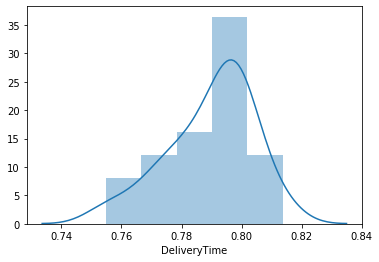

In [42]:
sns.distplot(dataset_3['DeliveryTime']) 

Visualization of Reciprocaly Transformed Sorting Time Column

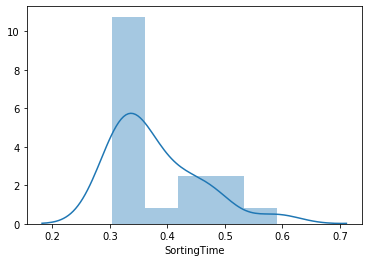

In [43]:
sns.distplot(dataset_3['SortingTime']) 

#### Fitting 3rd Simple Linear Regression model on Reciprocaly Transformed Dataset 

In [18]:
model_3 = smf.ols('DeliveryTime~SortingTime',data=dataset_3).fit() 

Test for Normality of Residuals (Q-Q Plot) of 3rd Model

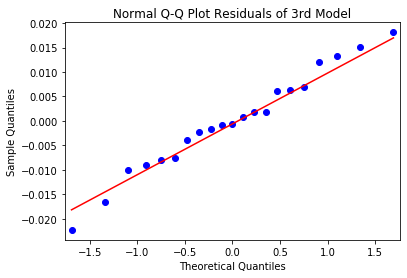

In [19]:
#import statsmodels.api as sm 
qqplot = sm.qqplot(model_3.resid,line='q') 
plt.title('Normal Q-Q Plot Residuals of 3rd Model') 
plt.show() 

Summary of 3rd Model 

In [45]:
model_3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     78.44
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           3.58e-08
Time:                        23:43:50   Log-Likelihood:                 76.708
No. Observations:                  21   AIC:                            -149.4
Df Residuals:                      19   BIC:                            -147.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8549      0.008    113.882      0.000       0.839       0.871
SortingTime    -0.1723      0.019     -8.857      0.000      -0.213      -0.132
==============================================================================
Omnibus:                        0.281   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.262
Skew:                           0.221   Prob(JB):                        0.877
Kurtosis:                       2.679   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""